**Title:** Predicting Iris Species with Machine Learning: A Beginner's Guide

**1. Project Setup and Dataset**

* **Dataset:**
    * Use the classic Iris Dataset ([https://www.kaggle.com/datasets/uciml/iris](https://www.kaggle.com/datasets/uciml/iris))
    * **Explain:** Brief overview of the dataset (features like sepal length, petal width, etc., and the target variable of species).


* **Environment Setup and Libraries**



In [1]:
# Install necessary libraries
!pip install numpy pandas matplotlib seaborn scikit-learn gradio

In [2]:
# Import everything
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import gradio as gr

**2. Data Loading and Exploration**

* **Loading the Data**

In [3]:
# iris = load_iris()
# df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
#                   columns=iris['feature_names'] + ['species'])

df = pd.read_csv('flower.csv')

* **Understanding the Data**

In [4]:
df.head()  # View the first few rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()  # Data types, missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()  # Basic statistics

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* **Visualizations**

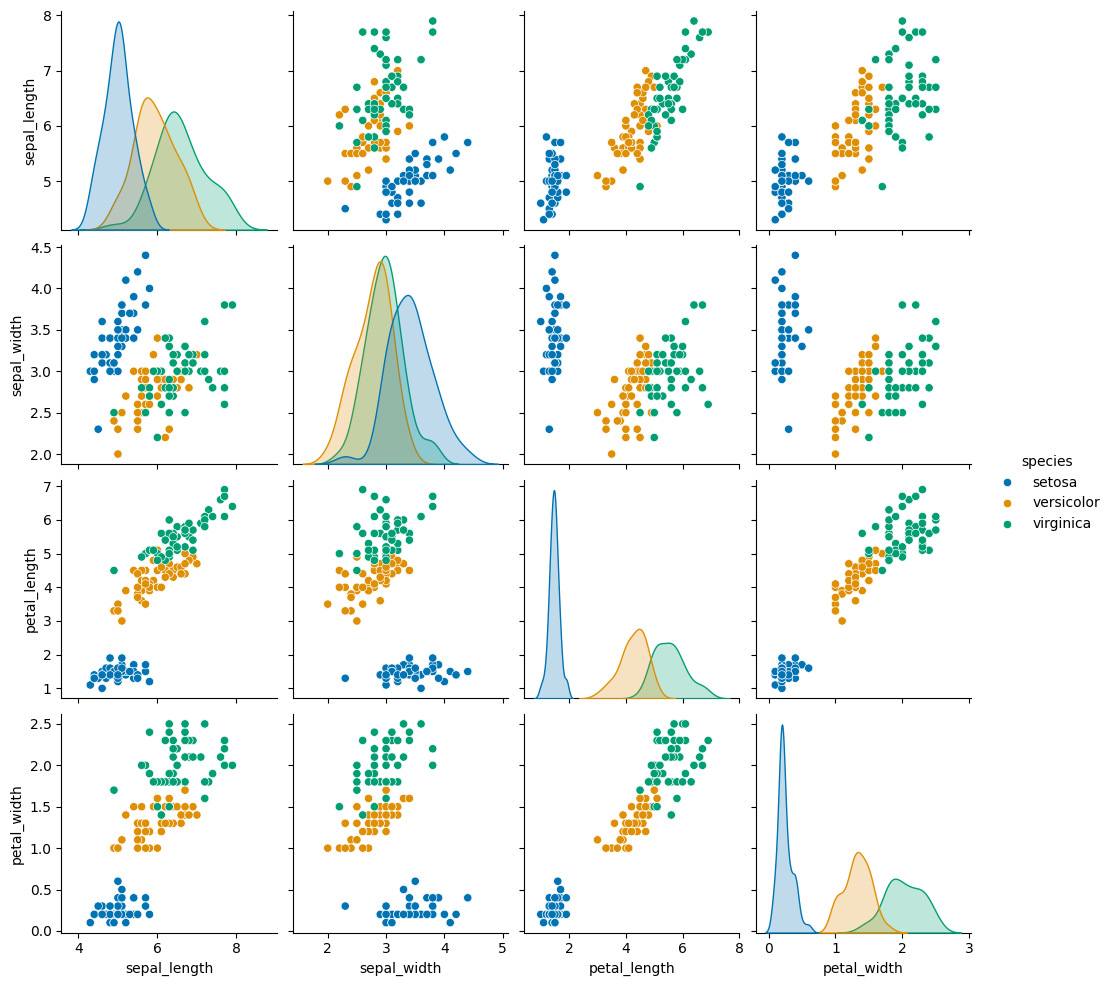

In [7]:
# Pairplot
sns.pairplot(df, hue='species', palette='colorblind');

**3. Data Preparation**

* **Encoding Categorical Features**

In [8]:
df.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
68,6.2,2.2,4.5,1.5,versicolor


In [9]:
# If you downloaded a dataset with species names, you'll need to encode them
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [10]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
df.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
139,6.9,3.1,5.4,2.1,2


* **Splitting Data**

In [13]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((135, 4), (15, 4), (135,), (15,))

**4. Model Building and Training**

* **Linear Regression**

In [15]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

* **K-Nearest Neighbors**

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # Experiment with different n_neighbors
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

* **Random Forest**

In [17]:
rf_model = RandomForestClassifier(n_estimators=100)  # Experiment with n_estimators
rf_model.fit(X_train, y_train)

RandomForestClassifier()

**5. Model Evaluation**

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"------ {name} ------")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [20]:
evaluate_model(lr_model, 'Logistic Regression')

------ Logistic Regression ------
Accuracy: 1.0
Confusion Matrix:
 [[6 0 0]
 [0 6 0]
 [0 0 3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [21]:
evaluate_model(knn_model, 'KNN')

------ KNN ------
Accuracy: 1.0
Confusion Matrix:
 [[6 0 0]
 [0 6 0]
 [0 0 3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [22]:
evaluate_model(rf_model, 'Random Forest')

------ Random Forest ------
Accuracy: 1.0
Confusion Matrix:
 [[6 0 0]
 [0 6 0]
 [0 0 3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



**6. Gradio User Interface**

In [24]:
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    sample = np.array([sepal_length, sepal_width, petal_length, petal_width]).reshape(1, -1)
    # Choose the best model based on your evaluation results
    prediction = lr_model.predict(sample)[0]
    species_name = le.classes_[prediction]
    return species_name

In [25]:
import gradio as gr

gr.Interface(fn=predict_species,
             inputs=[gr.Number(), gr.Number(), gr.Number(), gr.Number()],
             outputs=gr.Label(num_top_classes=3),
             examples=[[6.4, 2.8, 5.6, 2.1]]).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d6b765e69d8c9948aa.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [28]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
28,5.2,3.4,1.4,0.2,0
69,5.6,2.5,3.9,1.1,1
31,5.4,3.4,1.5,0.4,0
92,5.8,2.6,4.0,1.2,1
24,4.8,3.4,1.9,0.2,0


In [27]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)